# Part II - (Prosper Loan)
## by (David Gikandi)

## Investigation Overview

> We will begin with looking at individual features distribution, before diving to look at how they correlate to each other.

> We will looked at the correlation between the loan amount, investors, and the borrower rate. Secondly, the relationship between the employment status and the loan term was investigated.

> Lastly, we will also looked at the relationship between the borrower rate, prosper score, and the income range.


## Dataset Overview

> The dataset cosnsits of 113, 937 atrributes which include; loan amount, borrower rate, loan term, prosper score, investors, employment status, and income range. With more variables that were not utilised in this investigation.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataf
prosper_loan = pd.read_csv('prosperLoanData.csv')

# Selecting only the relevant columns
col = ['Term','LoanStatus','BorrowerRate','ProsperScore','EmploymentStatus','IsBorrowerHomeowner','IncomeRange','LoanOriginalAmount','Investors']

loans = prosper_loan[col]

# Convert EmploymentStatus and Loan status to ordered categorical data type
var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
            'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled'],
           'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-100,000+', 'Not displayed', 'Not employed']
           }

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

    
# Looking at the structure of the data
loans.shape

(113937, 9)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Borrower Rate Distribution

> The distribution appears to be multimodal. We can see that the first peak occurs between 0.1 and 0.2, with an even higher peak accurring at around 3.1.
> There are no rates above o.4, with very little rates between 3.5 to 4.0.

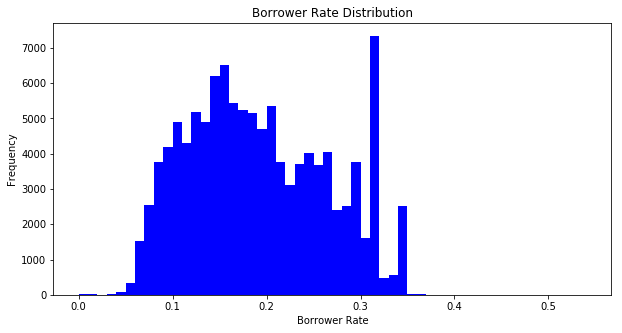

In [6]:
bins = np.arange(0, loans.BorrowerRate.max()+0.05, 0.01)
plt.figure(figsize=[10, 5])
plt.hist(data = loans, x = 'BorrowerRate', bins = bins, color = 'blue');
plt.title('Borrower Rate Distribution')
plt.xlabel('Borrower Rate')
plt.ylabel ('Frequency');

## Borrower rate vs Loan amount vs investors

> The correlatin between the  Borrower rate and the loan amount is -0.329. This negative correlation confirms our hypothesis that as the loan amount increases the borrower rate is decreases.

> The correlation between the Investors and the loan amount is 0.380. This implies that as the loan amount increases even more investors will be needed to finance the loan.

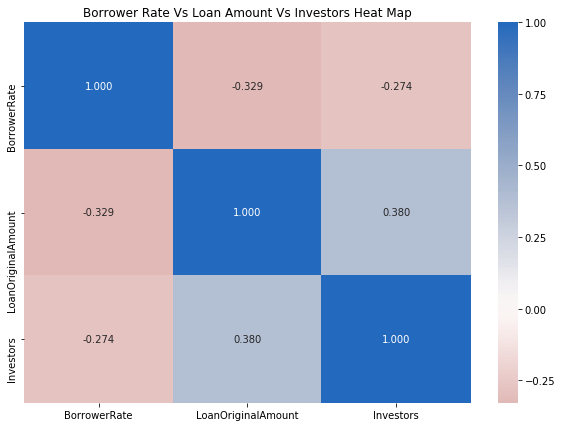

In [9]:
# Getting the numeric features of the dataset
numeric = ['BorrowerRate','LoanOriginalAmount','Investors']

# correlation plot
plt.figure(figsize = [10, 7])
sb.heatmap(loans[numeric].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Borrower Rate Vs Loan Amount Vs Investors Heat Map');

## Employment Status Vs Term
> In every employment status category, the preffered loan term is 36 months. This is followed by the 60 months term. While the 12 months term is the least desirable.


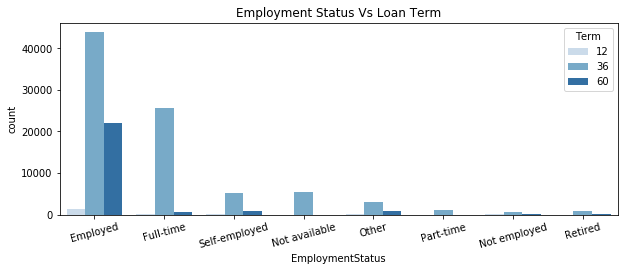

In [10]:
plt.figure(figsize = [10,12])
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.title('Employment Status Vs Loan Term')
plt.xticks(rotation=15);

## Borrower rate vs Prosper score vs Income range
> As expected, the least prosper score of 1.0 had the highest borrower rate of slightly above 3.0. While the highest prosper rating had the lowest borrower rating.

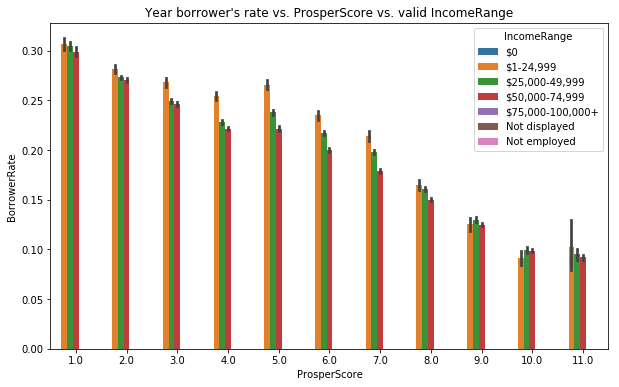

In [11]:
plt.figure(figsize=[10, 6]);
# Removing the invalid income ranges of $0, not displayed, and not available
valid_income_range = ['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-100,000+']
new_income_range = loans.loc[loans['IncomeRange'].isin(valid_income_range)]

sb.barplot(data = new_income_range, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title('Year borrower\'s rate vs. ProsperScore vs. valid IncomeRange');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_David.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_David.ipynb to slides
[NbConvertApp] Writing 375482 bytes to Part_II_slide_deck_David.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_David.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: